In [181]:

from pathlib import Path
import hvplot.pandas
import matplotlib
import pandas as pd
import numpy as np


In [182]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA

In [183]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [184]:
split_date = "2022-01-01"

In [185]:
dataframe = pd.read_csv(Path("./combined_data_shifted_time.csv"), index_col= "Date", parse_dates= True).dropna()
dataframe.tail()

,Jets_Shifted,Oil,USD,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road,Jets
Date,,,,,,,,,,,,,,,,,,
2022-12-23,-1.338432,0.576896,1.681854,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.377802
2022-12-27,-1.386750,0.637598,1.685902,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.417171
2022-12-28,-1.374223,0.655756,1.534131,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.490542
2022-12-29,-1.333064,0.780271,1.572581,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.411803
2022-12-30,-1.399276,0.770932,1.627217,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096,-1.404645


In [186]:
X_train = dataframe.loc[dataframe.index<split_date].copy()
X_train.drop("Jets", axis=1, inplace=True)
X_train.tail()


,Jets_Shifted,Oil,USD,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road
Date,,,,,,,,,,,,,,,,,
2021-12-27,-0.900586,0.383690,0.036655,-0.874344,-0.629192,0.0,3.307819,-0.645728,-0.160073,-0.318914,-0.223704,0.118646,0.313112,-0.768987,-0.585775,-0.883593,-0.574096
2021-12-28,-0.907697,0.267372,0.032608,-0.874344,-0.629192,0.0,3.307819,-0.645728,-0.160073,-0.318914,-0.223704,0.118646,0.313112,-0.768987,-0.585775,-0.883593,-0.574096
2021-12-29,-0.721046,0.401538,0.020466,-0.874344,-0.629192,0.0,3.307819,-0.645728,-0.160073,-0.318914,-0.223704,0.118646,0.313112,-0.768987,-0.585775,-0.883593,-0.574096
2021-12-30,-0.694383,0.486623,-0.062502,-0.874344,-0.629192,0.0,3.307819,-0.645728,-0.160073,-0.318914,-0.223704,0.118646,0.313112,-0.768987,-0.585775,-0.883593,-0.574096
2021-12-31,-0.635149,0.540061,-0.074645,-0.874344,-0.629192,0.0,3.307819,-0.645728,-0.160073,-0.318914,-0.223704,0.118646,0.313112,-0.768987,-0.585775,-0.883593,-0.574096


In [187]:
y_train = dataframe.loc[dataframe.index< split_date,['Jets']]
y_train.tail()

,Jets
Date,
2021-12-27,-0.642307
2021-12-28,-0.620833
2021-12-29,-0.678098
2021-12-30,-0.679888
2021-12-31,-0.687045


In [188]:
X_test = dataframe.copy()
X_test.drop("Jets", axis=1, inplace=True)
X_test.tail()


,Jets_Shifted,Oil,USD,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road
Date,,,,,,,,,,,,,,,,,
2022-12-23,-1.338432,0.576896,1.681854,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-27,-1.386750,0.637598,1.685902,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-28,-1.374223,0.655756,1.534131,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-29,-1.333064,0.780271,1.572581,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096
2022-12-30,-1.399276,0.770932,1.627217,-0.874344,-0.215749,0.0,-0.782521,0.31513,0.489499,0.641258,0.681619,1.29669,-3.193744,0.409537,-0.064755,-1.311285,-0.574096


In [189]:
y_test = dataframe.loc[:,['Jets']]
y_test.tail()

,Jets
Date,
2022-12-23,-1.377802
2022-12-27,-1.417171
2022-12-28,-1.490542
2022-12-29,-1.411803
2022-12-30,-1.404645


In [190]:
pca=PCA(n_components=5)

In [191]:
# Fit the PCA model on the transformed credit card DataFrame
X_train_data_pca = pca.fit_transform(X_train)

# Review the first 5 rows of the array of list data
X_train_data_pca[:5]

array([[-3.72569086,  0.42111677,  0.19035207,  1.1655833 ,  0.49679344],
       [-3.7341199 ,  0.41799424,  0.13664796,  1.18377052,  0.45963835],
       [-3.73437924,  0.42657939,  0.1486254 ,  1.18267373,  0.46402282],
       [-3.7328994 ,  0.40586388,  0.12361794,  1.18423466,  0.45636408],
       [-3.73991454,  0.4582383 ,  0.15738509,  1.19408352,  0.45564931]])

In [192]:
pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_)

0.9388850095331698

In [193]:
# Create the PCA DataFrame
X_train_data_pca_df = pd.DataFrame(
    X_train_data_pca,
    columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"]
)

# Review the PCA DataFrame
X_train_data_pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5
0,-3.725691,0.421117,0.190352,1.165583,0.496793
1,-3.734120,0.417994,0.136648,1.183771,0.459638
2,-3.734379,0.426579,0.148625,1.182674,0.464023
3,-3.732899,0.405864,0.123618,1.184235,0.456364
4,-3.739915,0.458238,0.157385,1.194084,0.455649


In [194]:
X_test_data_df = pca.transform(X_test)

In [195]:
# Create the PCA DataFrame
X_test_data_pca_df = pd.DataFrame(
    X_test_data_df,
    columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"]
)

# Review the PCA DataFrame
X_test_data_pca_df.describe()

,PCA1,PCA2,PCA3,PCA4,PCA5
count,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000
mean,-0.016803,-0.141463,0.001601,-0.261498,0.296195
std,3.132347,1.167917,0.834482,0.890076,1.010503
min,-4.800598,-2.594458,-2.651322,-2.789353,-1.306581
25%,-2.374932,-1.002997,-0.548393,-0.870465,-0.381135
50%,-1.297087,0.082693,-0.092557,-0.335246,0.106616
75%,2.377765,0.478924,0.670358,0.408276,0.713061
max,7.657760,4.169267,2.809897,1.841324,3.598861


In [198]:
ridge_model = Ridge(alpha= 0.3)

In [199]:
ridge_model.fit(X_train_data_pca_df,y_train)

Ridge(alpha=0.3)

In [200]:
pred_train_ridge = ridge_model.predict(X_train_data_pca_df)


In [201]:

print(r2_score(y_train, pred_train_ridge))

0.8881452181976446


In [202]:
pred_test_ridge = ridge_model.predict(X_test_data_pca_df)

In [203]:
print(r2_score(y_test, pred_test_ridge))

0.6995168448442799


<AxesSubplot:>

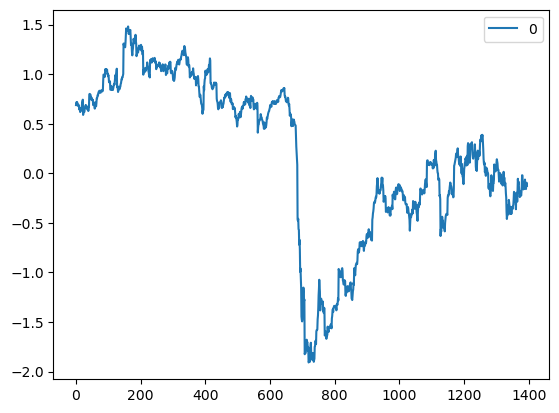

In [205]:
Pred_total_data_df = pd.DataFrame(pred_test_ridge)
Pred_total_data_df.plot()

In [206]:
df_plot_data =y_test.copy() 

In [207]:
df_plot_data["pred"] = pred_test_ridge
df_plot_data.head()

,Jets,pred
Date,,
2017-06-08,0.973018,0.687863
2017-06-09,0.943821,0.714837
2017-06-12,0.899166,0.710180
2017-06-13,0.914623,0.719284
2017-06-14,0.907754,0.709967


<AxesSubplot:xlabel='Date'>

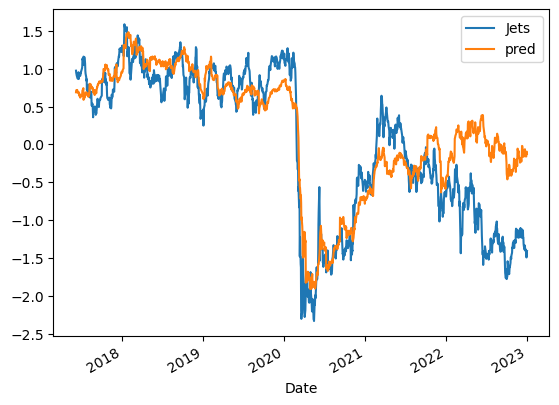

In [208]:
df_plot_data.plot()